In [1]:
from snf import datasets, compute, metrics
from sklearn import cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
import pandas as pd 

In [2]:
OTU = pd.read_csv('C:/Users/melod/Desktop/Mirror/RongRong/Dry/Thesis/SNF/Arch_W24/Input/TaxaCombined_Order_W24_without_T.muris.csv' , index_col = 0)
Flow = pd.read_csv('C:/Users/melod/Desktop/Mirror/RongRong/Dry/Thesis/SNF/Arch_W24/Input/Arch_Progression_H.poly.csv' , index_col = 0)

In [3]:
Flow = Flow.reindex(OTU.index).reset_index()

In [4]:
OTU_values = OTU.iloc[:, 1:].values
Flow_values = Flow.iloc[:, 1:].values

In [5]:
# Combine the two datasets for SNF
combined_data = [OTU_values, Flow_values]

In [6]:
# Compute affinity matrices
affinities = compute.make_affinity(combined_data, metric='euclidean', K=20, mu=0.3)

In [7]:
# Fuse the similarity matrices with SNF
fused = compute.snf(affinities, K=20)

In [8]:
# Apply clustering procedure using spectral clustering
first, _ = compute.get_n_clusters(fused)
fused_labels = cluster.spectral_clustering(fused, n_clusters=first)

In [9]:
merged_data_for_pca = np.hstack(combined_data)

In [10]:
# Perform PCA
pca_combined = PCA(n_components=2)
pca_result_combined = pca_combined.fit_transform(merged_data_for_pca)

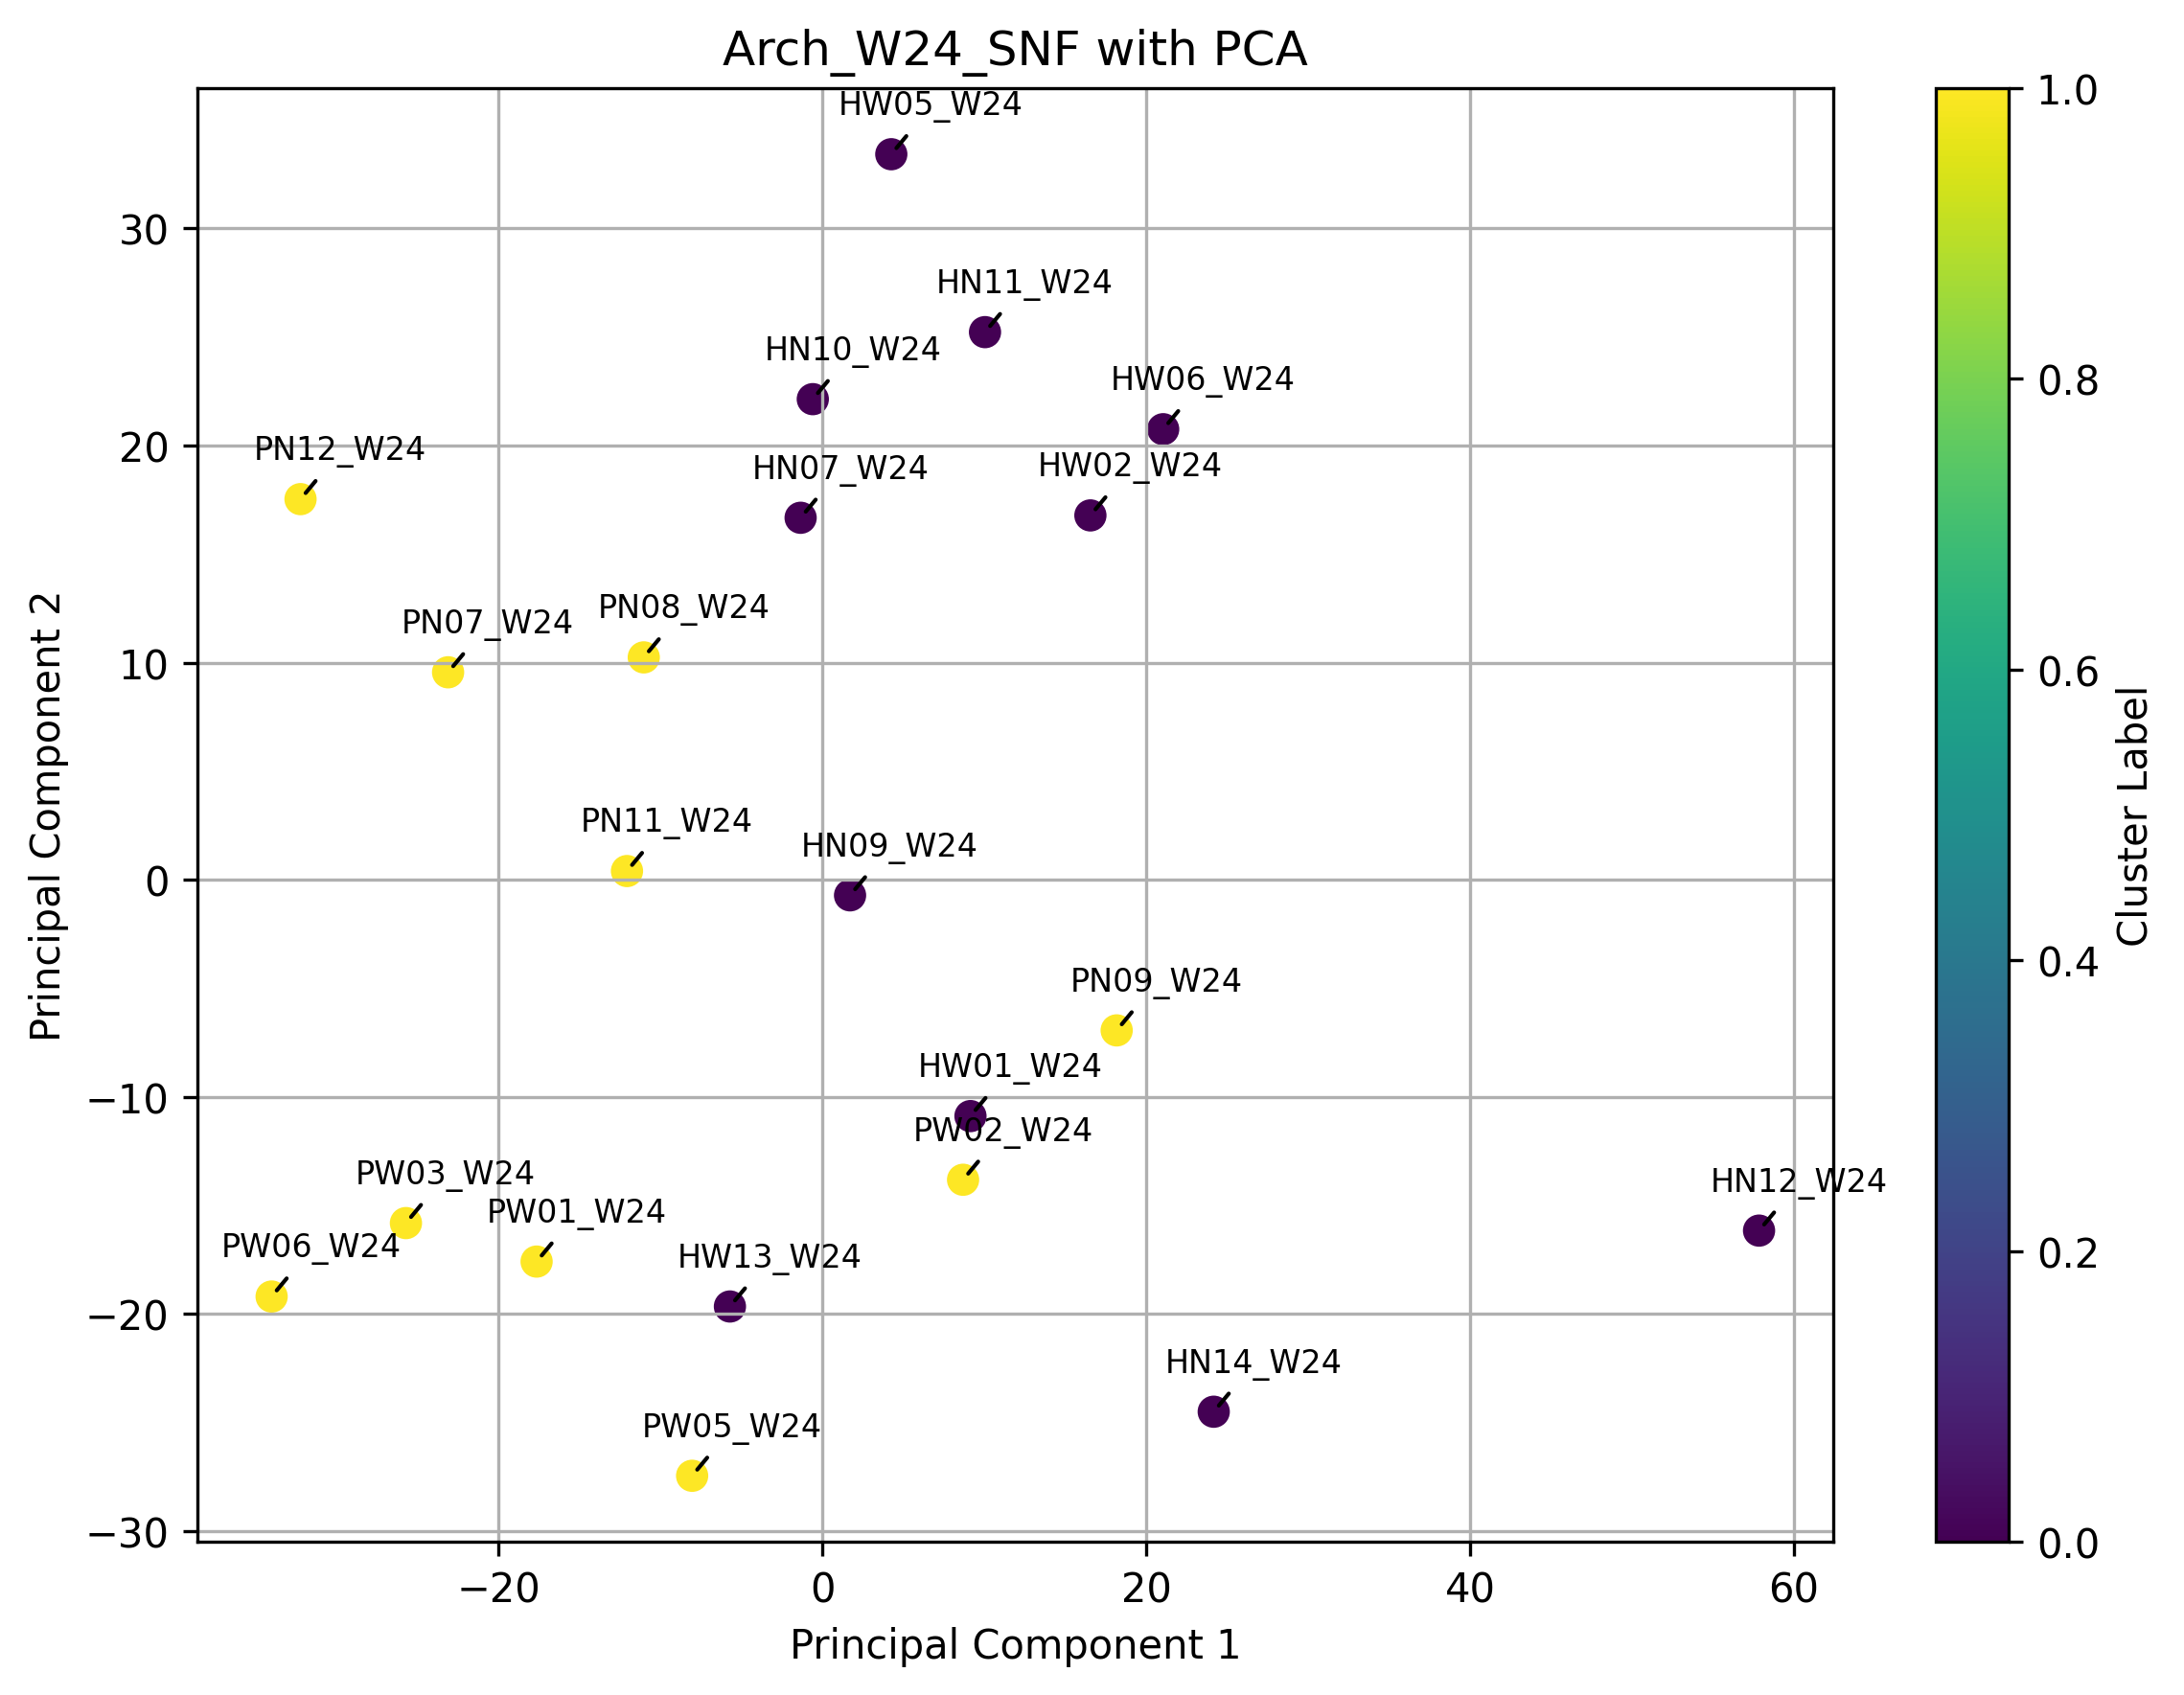

In [11]:
# Extract the sample names
sample_names = OTU.index

# Create a subplot
fig, ax = plt.subplots(figsize=(8,6), dpi=300)

# Plot PCA results with sample names and cluster labels on the specified axis
scatter = ax.scatter(pca_result_combined[:, 0], pca_result_combined[:, 1], c=fused_labels, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Arch_W24_SNF with PCA')
fig.colorbar(scatter, ax=ax, label='Cluster Label')
ax.grid(True)

# Annotate each sample with a line pointing to it on the specified axis
for i, sample_name in enumerate(sample_names):
    x, y = pca_result_combined[i, 0], pca_result_combined[i, 1]
    ax.annotate(sample_name, (x, y), fontsize=8, textcoords="offset points", xytext=(10,10), ha='center', arrowprops=dict(arrowstyle="-"))

# Adjust the figure bounds to fit content
plt.tight_layout()

plt.savefig('Arch_W24_SNF.png')

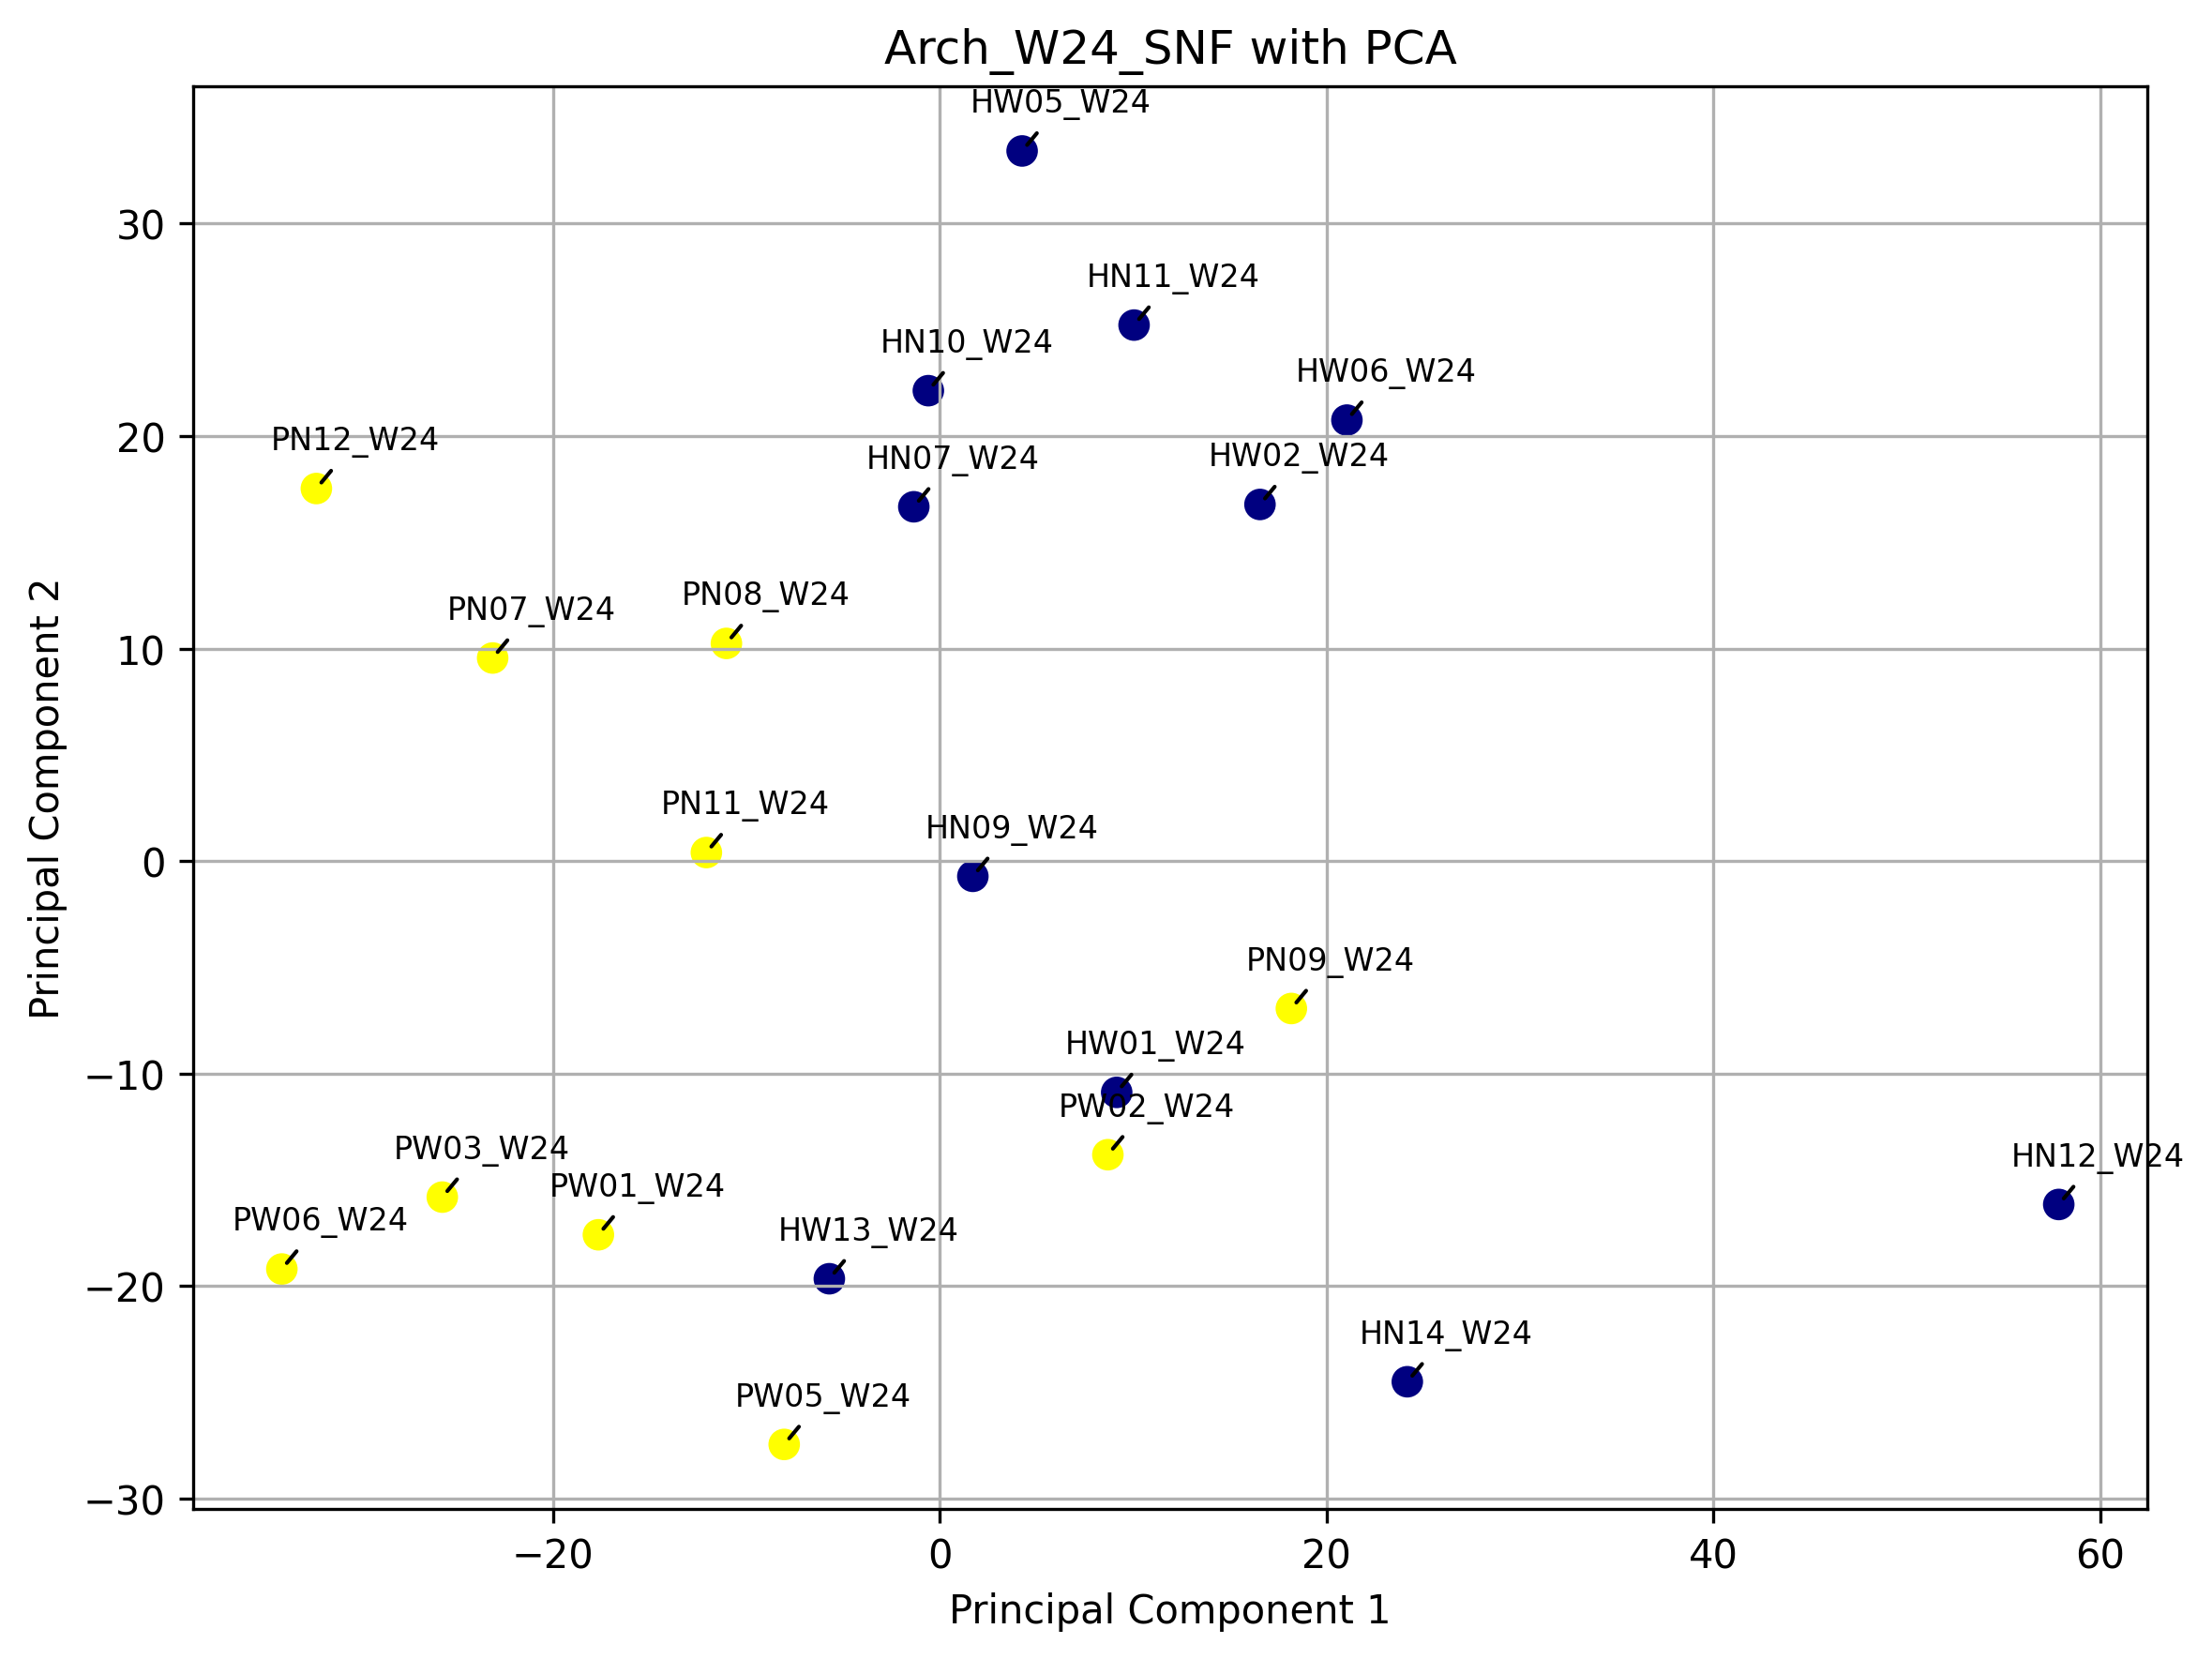

In [12]:
# Extract the sample names
sample_names = OTU.index

# Create a subplot
fig, ax = plt.subplots(figsize=(8,6), dpi=300)

# Define a list of colors you want to use for each cluster
colors = ['navy', 'yellow']  # Add more colors if you have more clusters

# Plot PCA results with sample names and cluster labels on the specified axis
scatter = ax.scatter(pca_result_combined[:, 0], pca_result_combined[:, 1], c=[colors[label] for label in fused_labels], s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Arch_W24_SNF with PCA')
ax.grid(True)

# Annotate each sample with a line pointing to it on the specified axis
for i, sample_name in enumerate(sample_names):
    x, y = pca_result_combined[i, 0], pca_result_combined[i, 1]
    ax.annotate(sample_name, (x, y), fontsize=8, textcoords="offset points", xytext=(10,10), ha='center', arrowprops=dict(arrowstyle="-"))

# Adjust the figure bounds to fit content
plt.tight_layout()

plt.savefig('Arch_W24_SNF.png')